In [ ]:
import pandas as pd
dataFrame1 = pd.read_csv('/content/zoo2.csv')
dataFrame2 = pd.read_csv('/content/zoo3.csv')
print(f"Quantidade de linhas do dataframe 1: {len(dataFrame1)}, e do dataframe 2: {len(dataFrame2)}")
print(f"Quantidade de colunas do dataframe 1 : {len(dataFrame1.columns)}, e do dataframe 2: {len(dataFrame2.columns)}")

Quantidade de linhas do dataframe 1: 43, e do dataframe 2: 70
Quantidade de colunas do dataframe 1 : 18, e do dataframe 2: 18


In [ ]:
dataFrameC = pd.merge(dataFrame1, dataFrame2, how='outer')
del dataFrameC['animal_name']
print(f"Quantidades de linhas: {len(dataFrameC)}")
print(f"Quantidades de colunas: {len(dataFrameC.columns)}")
dataFrameC

Quantidades de linhas: 113
Quantidades de colunas: 17


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,0,0,1,0,0,1,0,0,1,1,0,0,4,1,1,1,3
1,0,0,1,0,0,0,0,1,1,1,0,0,4,1,1,0,3
2,0,0,1,0,0,0,1,1,1,1,0,0,4,1,1,1,3
3,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0,3
4,0,0,1,0,0,0,0,1,1,1,0,0,4,1,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,0,0,1,0,1,0,1,0,0,1,1,0,6,0,0,0,6
109,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,7
110,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
111,1,0,1,0,0,0,1,0,0,1,1,0,8,0,0,0,7


In [ ]:
dataFrameC['class_type'] = dataFrameC['class_type'].astype(str)

In [ ]:
dataFrameC['class_type'].value_counts()

3    20
2    20
1    19
6    17
4    15
5    12
7    10
Name: class_type, dtype: int64

In [ ]:
varInd = dataFrameC.columns.difference(['class_type'], sort=False)
varInd

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize'],
      dtype='object')

In [ ]:
X = dataFrameC[varInd].values
y = dataFrameC['class_type']
y

0      3
1      3
2      3
3      3
4      3
      ..
108    6
109    7
110    7
111    7
112    7
Name: class_type, Length: 113, dtype: object

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
objClass = DecisionTreeClassifier(random_state=10, criterion="gini", max_depth=7)

In [ ]:
objClass.fit(X, y)

DecisionTreeClassifier(max_depth=7, random_state=10)

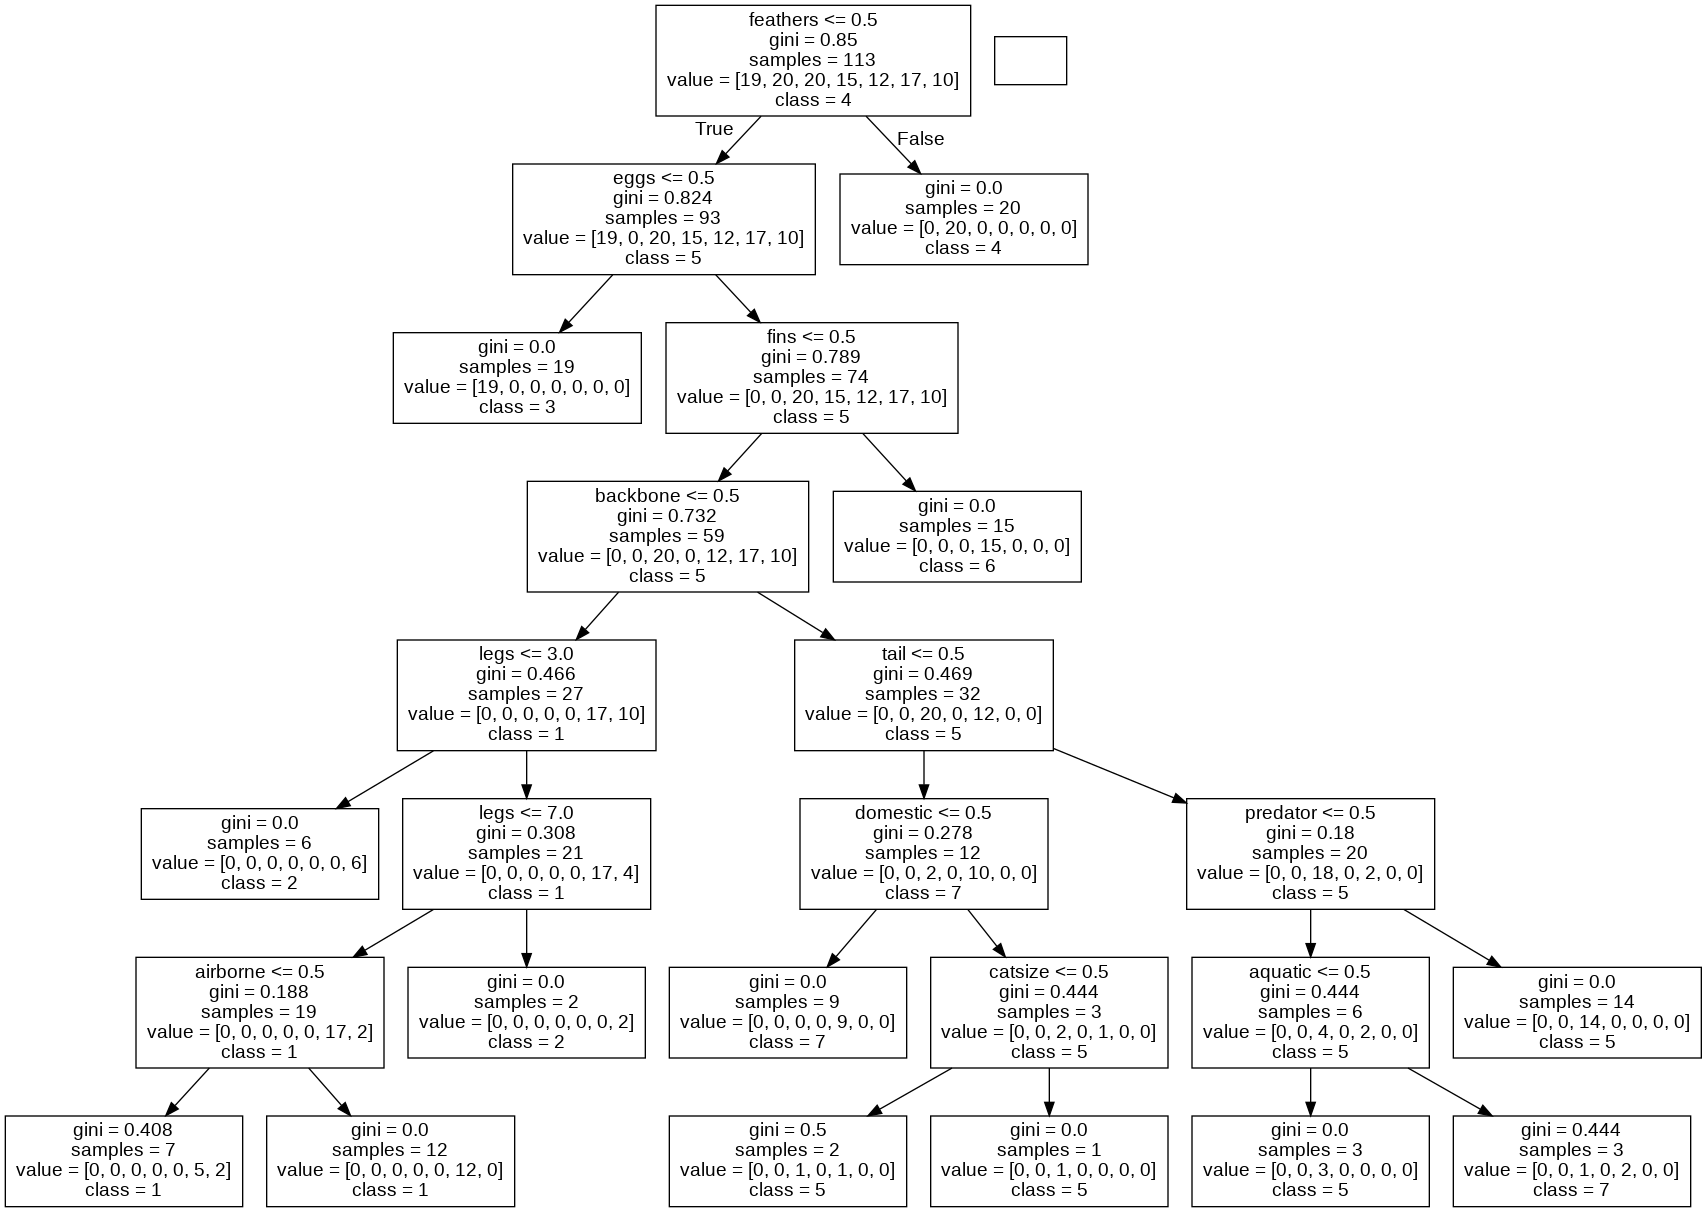

In [ ]:
from IPython.display import Image  
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(objClass, out_file=None, 
                                feature_names=varInd,  
                                class_names=dataFrameC.class_type.unique())

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [ ]:
animal1 = [0,0,1,0,0,1,0,0,1,1,0,0,4,1,1,1] #réptil
animal2 = [1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1] #mamífero
animal3 = [0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,1] #ave
animal4 = [0,1,1,0,0,0,1,0,1,1,0,0,2,1,0,0] #????? (dinossauro)

conjAnimais = pd.DataFrame([animal1, animal2, animal3, animal4], columns=varInd)
objClass.predict(conjAnimais)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array(['5', '1', '2', '2'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10)
print("Quantidade de registros separados para treinamento:",len(X_train))
print("Quantidade de registros separados para teste:", len(X_test))

Quantidade de registros separados para treinamento: 101
Quantidade de registros separados para teste: 12


In [ ]:
from sklearn.tree import DecisionTreeClassifier
objClassificador2 = DecisionTreeClassifier(random_state=10,criterion="gini",max_depth=7)
objClassificador2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, random_state=10)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = objClassificador2.predict(X_test)
y_pred
precisao = accuracy_score(y_test,y_pred)
print("A precisão do modelo a partir da análise dos dados separados para teste foi:", precisao)

A precisão do modelo a partir da análise dos dados separados para teste foi: 0.9166666666666666


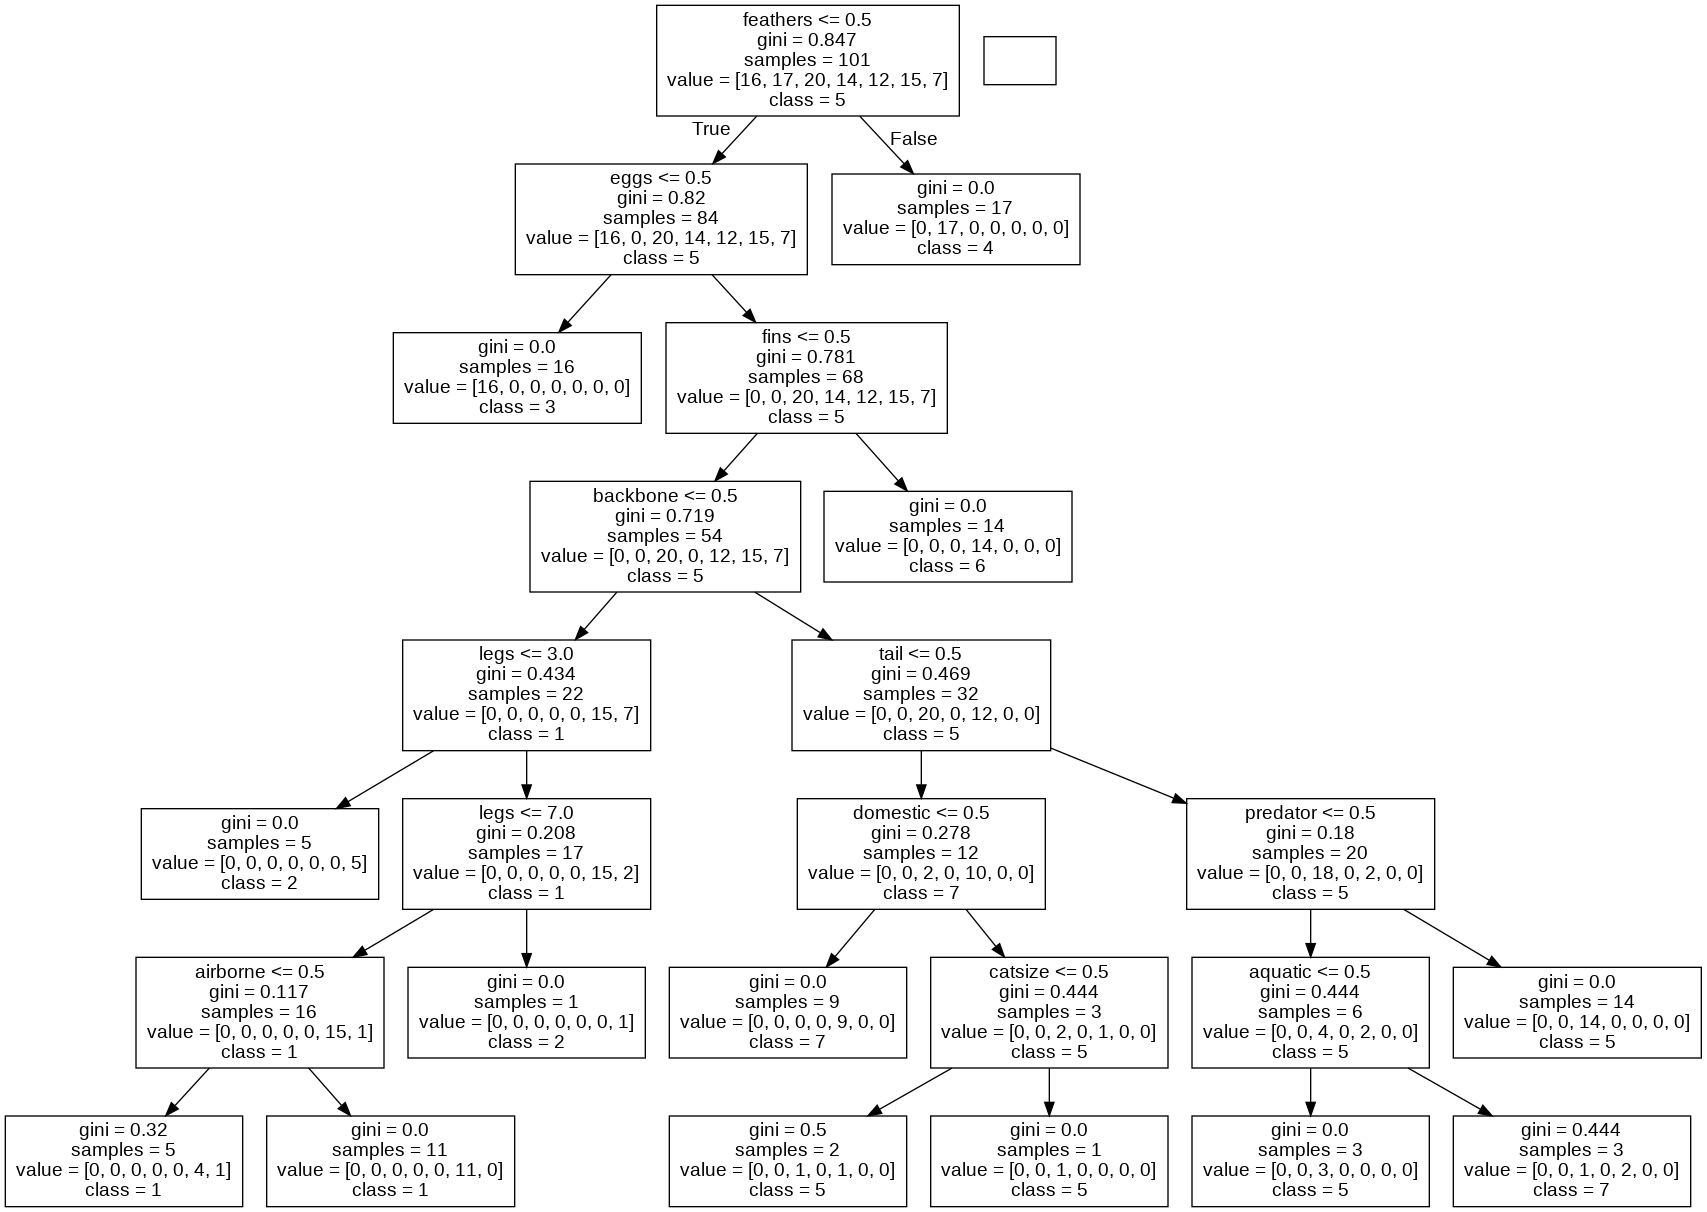

In [ ]:
from IPython.display import Image  
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(objClassificador2, out_file=None, 
                                feature_names=varInd,  
                                class_names=dataFrameC.class_type.unique())

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())